# Practicals for lecture 1.1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/practicals/Practicals_1.1.ipynb)

## More on `numpy`

#### 1.1.0 Operations with arrays

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Create an array with a range of numbers from 1 to 10 (not from 0 to 9!), 
# then elevate each element to the power of 2:

np.arange(1, 11) ** 2


array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [4]:
# Use np.stack to create a 10*10 matrix with rows of identical values going from 0 to 9, in this way:

# final_matrix = [[0,0,0,0,0,...],
#                 [1,1,1,1,1,...],
#                 [2,2,2,2,2,...],
#                 [.., .., .., ]]

# Hint: you can use a list comprehension to create the list of arrays to pass to np.stack()!

np.stack([np.ones(10)*i for i in range(10)])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [5]:
# you have the following data matrix:
data_matrix = np.array([[1,2,3, 2, 5, 0, 2], 
                        [4,5,6, 8, 2, 3, 1]])

# And this array of offsets, one for every row:
offsets = np.array([2, 5])

# Use stack to repeat the offsets as many times as the number of columns in data_matrix,
# so that you can subtract offsets from each row of data_matrix:
offsets_stacked = np.stack([offsets, ]*7).T
data_matrix - offsets_stacked

array([[-1,  0,  1,  0,  3, -2,  0],
       [-1,  0,  1,  3, -3, -2, -4]])

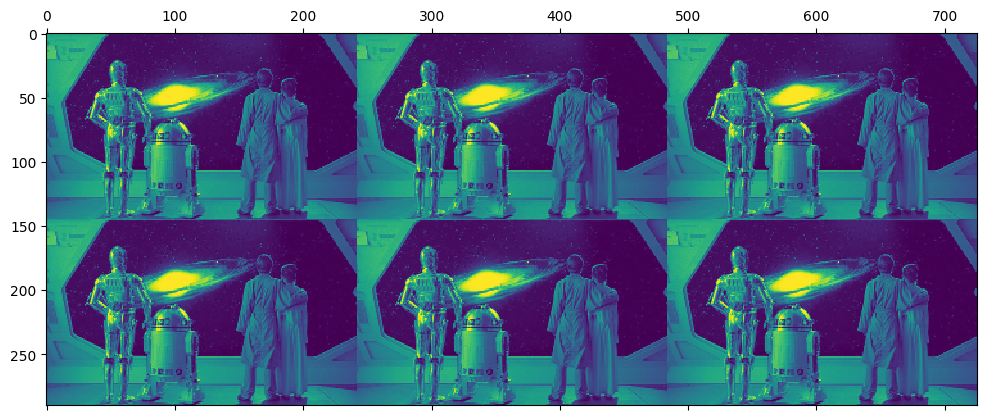

In [7]:
def fetch_image():
    import requests
    from io import BytesIO

    response = requests.get("https://github.com/vigji/python-cimec-2025/raw/main/practicals/data/correct_img.npy")
    
    return np.load(BytesIO(response.content))

img = fetch_image()

# Start from the matrix you downloaded with the fetch_image() function above (same as last week practicals).
# Now use np.concatenate to repeat the matrix 2 times vertically, and 3 times horizontally.
# Hint: you will have to call np.concatenate twice to do it!
# Use plt.matshow() to check the result.

n_rows, n_cols = 2, 3
tiled_cols = np.concatenate([img,]*n_cols, axis=1)
tiled_rows = np.concatenate([tiled_cols,]*n_rows, axis=0)
plt.matshow(tiled_rows)
plt.show()


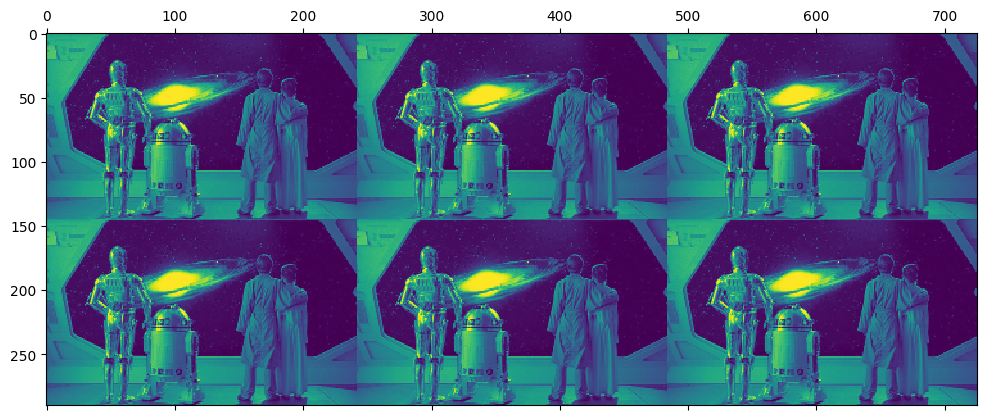

In [8]:
# Google (or chatGPT) how to use the np.tile() function to perform the same tiling using only one operation!

tiled_img = np.tile(img, (n_rows, n_cols))
plt.matshow(tiled_img)
plt.show()

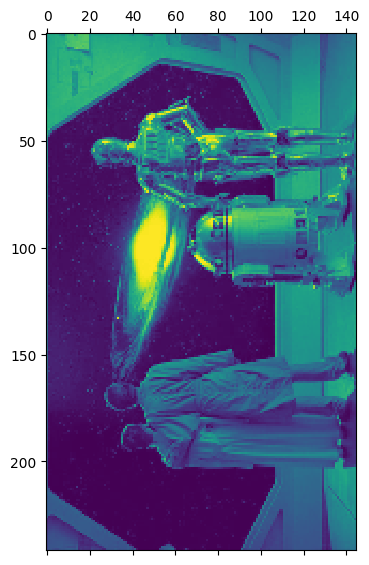

In [9]:
# use plt.matshow() to show the transposed image:
plt.matshow(img.T)
plt.show()


#### 1.1.1 Broadcasting

In [17]:
# Let's fix the offset subtraction above using broadcasting instead of stacking arrays!

# you have the following data matrix:
data_matrix = np.array([[1,2,3, 2, 5, 0, 2], 
                        [4,5,6, 8, 2, 3, 1]])

# And this array of offsets, one for every row:
offsets = np.array([2, 5])

# We want to subtract the offsets from each row of data_matrix.

# Remember, to match arrays we need to have either matching dimension size, OR a dimension size of 1.
# Currently, numpy is comparing second dimension of data_matrix with first dimension of offsets, 
# and they do not match.

# Use the syntax we have seen to add new singleton dimensions to convert offsets to an array
# of shape (2, 1), and then use it to try the operation again, so that numpy can broadcast the subtraction:
data_matrix - offsets[:, None]

array([[-1,  0,  1,  0,  3, -2,  0],
       [-1,  0,  1,  3, -3, -2, -4]])

In [23]:
# Create a 3D array of shape (2, 3, 4) filled with random numbers between 0 and 1
# Create a 1D array of shape (4,) with values [1, 2, 3, 4]
# Use broadcasting to multiply each element in the last dimension of the 3D array
# by the corresponding value in the 1D array:
threed_arr = np.random.rand(4, 3, 2) 
gains = np.array([1, 2, 3, 4])
threed_arr * gains[:, np.newaxis, np.newaxis]

array([[[0.59201432, 0.41488303],
        [0.4497575 , 0.28297326],
        [0.70407024, 0.58706451]],

       [[1.36133206, 1.32250586],
        [0.64003252, 1.34324053],
        [0.72471179, 0.95765245]],

       [[0.14047097, 0.71958023],
        [0.99596116, 0.12855524],
        [2.93988619, 0.31047197]],

       [[3.72192558, 1.68749773],
        [1.05893684, 0.46446809],
        [1.29148391, 2.86869185]]])

In [17]:
# Create two arrays:
# - A 2D array of shape (3, 4) with random integers between 0 and 9
# - A 1D array of shape (4,) with values [2, 4, 6, 8]
# Use broadcasting to create a boolean mask where each element in the 2D array
# is greater than the corresponding value in the 1D array
# Then use this mask to set all elements that are greater to 0 

np.random.seed(42)
random_arr = np.random.randint(0, 10, (3, 4))
vals_to_filter = np.array([2, 4, 6, 8])
bool_mask = random_arr > vals_to_filter
print(bool_mask)
random_arr[bool_mask] = 0
random_arr


[[ True False  True False]
 [ True  True False False]
 [ True False False False]]


array([[0, 3, 0, 4],
       [0, 0, 2, 6],
       [0, 4, 3, 7]])

#### 1.1.2 Stats over numpy arrays

In [26]:
# Use np.random.normal to initialize a vector of 1000 numbers of mean 10 and standard deviation 3. 
# Then calculate the actual mean and standard deviation of the array you got using numpy.

normal_distr_points = np.random.normal(10, 3, (1000,))
np.mean(normal_distr_points), np.std(normal_distr_points)

(9.96195000847271, 3.047956454190388)

In [33]:
# Exercise: this function generate sample Reaction Times data
# for many subjects. (200 subjects, 1000 RTs each)

def generate_RT_data(n_subjects=200, n_samples_per_subject=1000):
    """
    Generates Reaction Time data for a given number of subjects, each with their own distribution parameters.
    
    Parameters:
    n_subjects (int): Number of subjects
    n_samples_per_subject (int): Number of samples (RT times) per subject
    
    Returns:
    np.ndarray: A 2D array where each row represents the RT times for a subject
    """
    np.random.seed(0)  # For reproducibility
    shift = 0.500  # Shift of the distribution
    # Initialize an empty array to store the RT times for all subjects
    RT_data = np.empty((n_subjects, n_samples_per_subject))
    
    for i in range(n_subjects):
        # Assuming mu ranges from 90 to 110 and sigma from 10 to 20 for the subjects
        mu = np.random.uniform(0.090, 0.110)
        sigma = np.random.uniform(0.10, 0.20)
        RT_data[i] = np.random.normal(mu, sigma, n_samples_per_subject) + shift
    
    return RT_data

# This is our data matrix:
rt_data = generate_RT_data()
# Compute the mean of the RT times for each subject and store it in a reaction_time_means
# array. Rember to specify the axis along which you are taking the mean!
subject_means = np.mean(rt_data, axis=1)
subject_means

# Then, use broadcasting to subtract the mean RTs from the data.
# Bonus: then organize your code in a function for mean subtraction!
mean_subtracted = rt_data - subject_means[:, np.newaxis]

In [19]:
# RUN THIS CELL TO DOWNLOAD THE DATA

import numpy as np
from matplotlib import pyplot as plt
import requests
import json

def download_meteo_data(start_date="2022-01-01", end_date="2022-12-31",
                        latitude="45.88204", longitude="11.03647",
                        data="temperature_2m"):
    """Download meteo historical data from open-meteo.com.
    
    Parameters
    ----------
        start_date : str
            Beginning of time series.
            
        end_date : str
            End of time series.
            
        latitude : float
            Latitude of the time series.
            
        longitude : float
            Longitude of the time series.
            
        data : str
            Data to download. One of "temperature_2m", "relativehumidity_2m",
            "precipitation", "snowfall", "windspeed_10m".
            
    Returns
    -------
        np.array
            1D array of timestamps
        np.array
            1D array of data, sampled every hour (24 points per day)

    """
    BASE_URL = "https://archive-api.open-meteo.com/v1/"
    query = f"archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={data}"

    r = requests.get(BASE_URL + query)
    json_dict = json.loads(r.text)
    
    if "hourly" not in json_dict.keys():
        print(json_dict)
        return None, None
    else:
        return np.array(json_dict["hourly"]["time"]).reshape(-1, 24), np.array(json_dict["hourly"][data]).reshape(-1, 24)

timestamps_array, temperatures_array = download_meteo_data()
temperatures_array


array([[4.4, 2.9, 3.2, ..., 3.8, 3.5, 3.6],
       [4.2, 2.6, 2.3, ..., 2.7, 2. , 1.9],
       [3. , 2.7, 2.1, ..., 2.5, 3.2, 2.9],
       ...,
       [4.7, 3.2, 3. , ..., 6.7, 6.6, 6.7],
       [6.6, 6.4, 6.3, ..., 6.5, 6.7, 6.5],
       [6.8, 6.2, 5.8, ..., 9.1, 9.3, 8.6]])

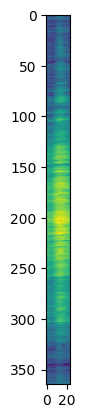

In [20]:
# Run the cell above to download an array of temperatures in Rovereto during 2022. 
# Temperatures data are sampled every hour: can you interpret the shape of the array?
# Plot it with plt.matshow() to check if it makes sense.
plt.figure()
plt.imshow(temperatures_array)

In [21]:
temperatures_array.shape

(365, 24)

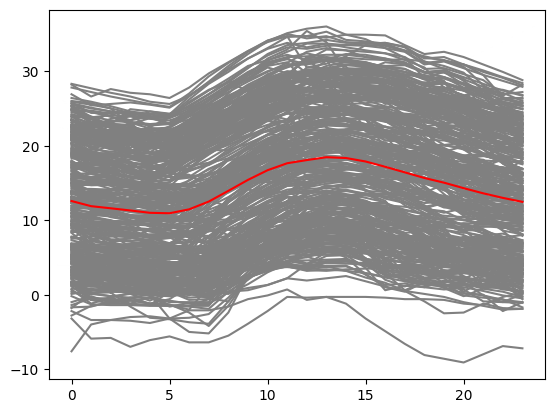

In [22]:
# Use plt.plot to show temperatures for all days (each day a line). You can do it in a for loop,
# or in one call of the function given the right dimension order for the data matrix!

# Compute the average temperature line over days, and plot it on top of the individual day lines.
# (you can pass the `c` argument to specify line color. 
# Make the lines of the individual days gray and the average red!)
daily_avg = np.mean(temperatures_array, axis=0)
plt.figure()
plt.plot(temperatures_array.T, c="gray")
plt.plot(daily_avg, c="red")
plt.show()

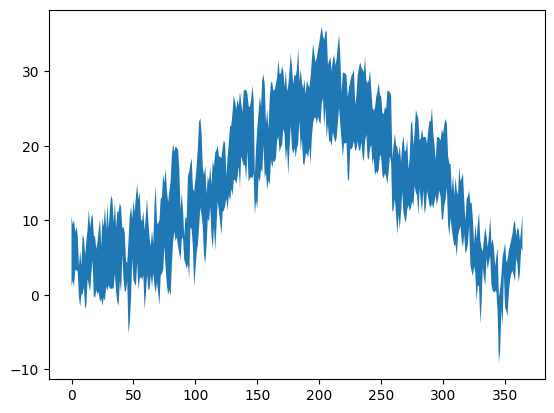

In [23]:
# From the temperatures data, create one-dimensional arrays with the minimum, mean and maximum temperatures
# of each day.
t_min = np.min(temperatures_array, axis=1)
t_max = np.max(temperatures_array, axis=1)


# Look into the documentation for the plt.fill_between() function, and use it to make a plot 
# where you represent the temperature range for every day of the year.
plt.figure()
plt.fill_between(np.arange(365), t_min, t_max)


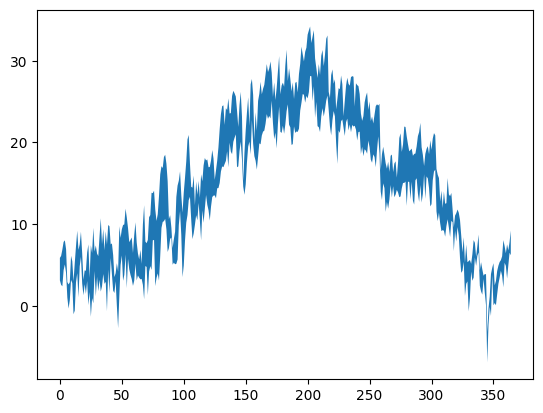

In [24]:
# Repeat the same, but now representing the 25th-75th percentile range for every day.
perc_25 = np.percentile(temperatures_array, 25, axis=1)
perc_75 = np.percentile(temperatures_array, 75, axis=1)
plt.figure()
plt.fill_between(np.arange(365), perc_25, perc_75)


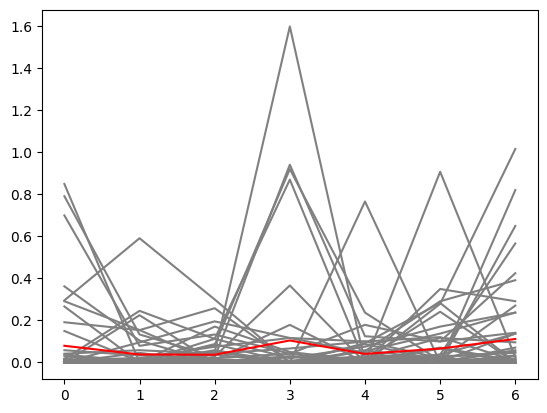

In [32]:
# [Advanced]
# To do this exercise, you'll have to know or look into how to reshape arrays.
#  Are Murphy's laws true? Does it rain more on weekends?

# 0. Look into docs of download_meteo_data(), and use it to download *precipitation data* from 2022, 
# but change the end_date argument to be end_date="2022-12-30" to have a multiple of 7 days!

# 1. Compute daily averages of precipitation (you will get a 1D array of shape (n_days,))
# 2. Reshape the daily averages array to be of shape (n_weeks, n_weekdays=7)
# 3. Take the average over the n_weeks dimension and plot median precipitation for each weekday!
# 4. Plot the average (bonus: fill in using std, or percentiles - in which case replace mean with median)

# 0:
timestamps, precipitation_data = download_meteo_data(data="precipitation")
precipitation_data = precipitation_data[:-1]

# 1:
daily_avg = np.mean(precipitation_data, axis=1)

# 2:    
weekly_avg = np.reshape(daily_avg, (52, 7))

# 3:
median_weekly_avg = np.mean(weekly_avg, axis=0)
plt.figure()
plt.plot(weekly_avg.T, c="gray")
plt.plot(median_weekly_avg, c="red")

plt.show()


First day of the year was a:  Saturday


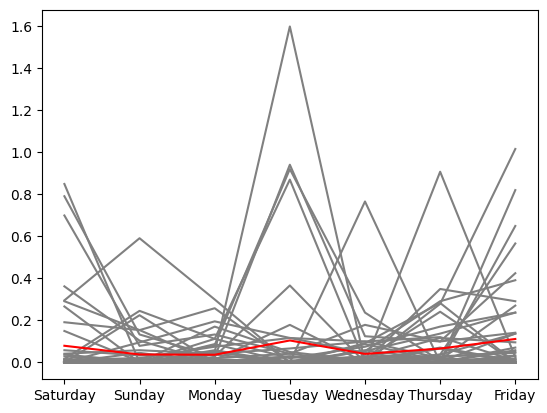

In [47]:
# we actually need to figure out the day of the week for our sequence of days!
from datetime import datetime
first_day = timestamps[0, 0]
#parse 2022-01-01T00:00 string to infer day of the week as text:
day_of_week = datetime.strptime(first_day, "%Y-%m-%dT%H:%M").strftime("%A")
print("First day of the year was a: ", day_of_week)

# make array of day of week for each day in precipitation_data
day_of_week_data = np.array([datetime.strptime(day, "%Y-%m-%dT%H:%M").strftime("%A") for day in timestamps[:, 0]])
xlabels = day_of_week_data[:7]
plt.figure()
plt.plot(weekly_avg.T, c="gray")
plt.plot(median_weekly_avg, c="red")
plt.xticks(np.arange(7), xlabels)
plt.show()